In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
from sklearn.inspection import permutation_importance



In [10]:
# Separando as features e a label
X = pd.read_csv("train_w_metricas.csv",index_col=0)
y = X['label']
columns_to_remove = [
    'label', 'code', 'cbo', 'cboModified', 'fanin', 'fanout', 'wmc', 
    'dit', 'noc', 'rfc', 'lcom', 'lcom*', 'tcc', 'lcc'
]
X = X.drop(columns=columns_to_remove, axis=1)

In [11]:
# Dividindo o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [ ]:
# SMOTE
smote = SMOTE(random_state=None)
X_res, y_res = smote.fit_resample(X, y)


In [13]:
# Definindo o modelo SVM
svm_model = SVC(kernel='rbf')

In [14]:
# Configurando o Grid Search para otimizar os hiperparâmetros
param_grid = {
    'C':  [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01]
}

In [15]:
# Executando o Grid Search com validação cruzada (K-Fold)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_res, y_res)

# Melhor modelo encontrado pelo Grid Search
best_svm_model = grid_search.best_estimator_
print(best_svm_model)

SVC(C=10, gamma=0.1)


In [16]:
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=30, random_state=None)


In [ ]:
y_pred = best_svm_model.predict(X_test)

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo as métricas
print(best_svm_model)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

SVC(C=10, gamma=0.1)
Accuracy: 0.9219
Precision: 0.9302
Recall: 0.8511
F1 Score: 0.8889


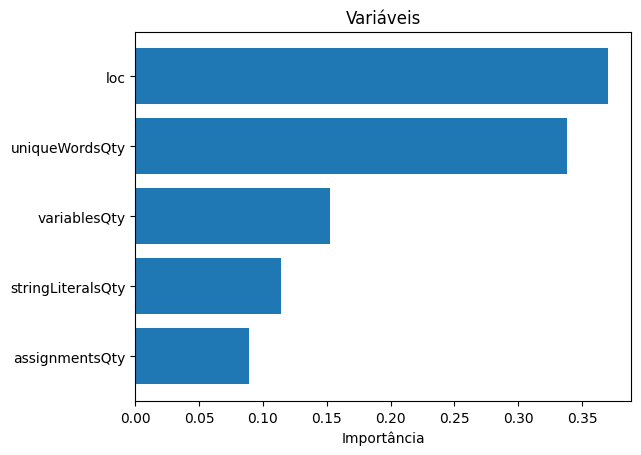

In [20]:
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]
sorted_idx = perm_importance.importances_mean.argsort()[-5:]

plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Importância")
plt.title("Variáveis")
plt.show()

In [9]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9297
Precision: 0.8696
Recall: 0.9302
F1 Score: 0.8989
